# Wellbeing Analysis Project

This notebook examines the relationship between lifestyle factors and wellbeing factors through three research questions and what we hope to find:
- Q1: Days without social media vs. Wellbeing Score
- Q2: Social media platform user demographics and screen time
- Q3: Predictors of stress levels

## Table of Contents

1. [Setup & Imports](#1-setup--imports)
2. [Data Loading](#2-data-loading)
3. [Data Understanding](#3-data-understanding)
4. [Data Cleaning](#4-data-cleaning)
5. [Question 1: Days Without Social Media and Wellbeing](#5-question-1)
6. [Question 2: Social Media Platform Demographics](#6-question-2)
7. [Question 3: Stress Level Predictors](#7-question-3)
8. [Summary and Conclusions](#8-summary-and-conclusions)

## 1. Setup & Imports

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#from scipy import stats
#import warnings
#warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows', 50)

# Machine learning








## 2. Data Loading

In [4]:
# Load the dataset
socialmedia_data = pd.read_csv('socialmedia_dataset_orginal.csv')



## 3. Data Understanding

### 3.1 First Look at the Data

In [ ]:
# Display first few rows


### 3.2 Dataset Information

In [ ]:
# Get basic information about the dataset


In [ ]:
# Column names


### 3.3 Statistical Summary

In [ ]:
# Statistical summary of numerical columns


## What This Check Tells Us:
### What Each Check Means:

- count, min max std etc through our columns

### 3.4 Check for Data Quality Issues

In [ ]:
# Check for missing values


In [ ]:
# Check for duplicate rows



# Check value ranges for key variables
Checking min max for each:
Days_Without_Social_Media: 
Daily_Screen_Time: 
Age:

## 4. Data Cleaning

### 4.1 Create a Working Copy

In [5]:
# Create a copy to preserve original data
socialmedia_clean = socialmedia_data.copy()


### 4.2 Create Wellbeing Score Composite

In [6]:
# Create composite Wellbeing Score
# Wellbeing Score = f(Happiness_Index, Sleep_Quality, Exercise_Frequency, Stress_Level)

socialmedia_clean['Wellbeing_Score'] = (socialmedia_clean['Happiness_Index(1-10)'] +
    socialmedia_clean['Sleep_Quality(1-10)'] + socialmedia_clean['Exercise_Frequency(week)'] +
    (11 - socialmedia_clean['Stress_Level(1-10)'])
)



### 4.6 Save Cleaned Data

In [13]:
# Save cleaned dataset
socialmedia_clean.to_csv('wellbeing_data_cleaned.csv', index=False)


## Data cleaning - what we've done so far

Missing values if any 
Duplicates removed if any 
Outliers if any
Wellbeing Score created  
Cleaned data saved

# start from here

* resume work with cleaned data start here:*

In [ ]:
# Load cleaned data
#df_clean = pd.read_csv('wellbeing_data_cleaned.csv')
# create a working copy
#df_working = df_clean.copy() # so you don't mess up the cleaned data

## 5. Question 1: Days Without Social Media and Wellbeing

**Research Question:** To what extent is the number of Days_Without_Social_Media related to an individual's overall Wellbeing_Score?

### 5.1 Wellbeing Score vs Days Without Social Media

In [17]:
# Calculate Days Without Social Media statistics by the Wellbeing Score
socialmedia_clean.groupby('Days_Without_Social_Media')['Wellbeing_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Days_Without_Social_Media,,,,,,,,
0.0,48.0,21.083333,4.057215,14.0,18.00,21.0,24.0,29.0
1.0,58.0,21.620690,3.773535,14.0,19.00,21.5,25.0,29.0
2.0,86.0,20.906977,4.533867,12.0,18.00,21.0,24.0,32.0
3.0,92.0,21.456522,4.529302,10.0,18.75,22.0,24.0,32.0
4.0,87.0,22.172414,4.210195,13.0,20.00,22.0,25.0,31.0
5.0,78.0,21.717949,4.600670,12.0,19.00,22.0,25.0,32.0
6.0,36.0,21.972222,4.031916,14.0,19.75,22.0,25.0,29.0
7.0,14.0,20.214286,5.351902,13.0,16.25,18.5,25.0,30.0
9.0,1.0,20.000000,NaN,20.0,20.00,20.0,20.0,20.0


In summary the average wellbeing score of users is approximately 21 with most user taking 3 days off from social media. Also from the statistical summary we can see that there is not enough data to calculate the standard deviation as there was only one user who went 9 days without social media. This may present a skewed result later on in the analysis.

In [ ]:

# Statistical Summary
socialmedia_clean['Wellbeing_Score'].describe()

count    500.000000
mean      21.510000
std        4.342766
min       10.000000
25%       19.000000
50%       22.000000
75%       25.000000
max       32.000000
Name: Wellbeing_Score, dtype: float64

In [ ]:
# Statistical Summary 
socialmedia_clean['Days_Without_Social_Media'].describe()

count    500.000000
mean       3.134000
std        1.858751
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        9.000000
Name: Days_Without_Social_Media, dtype: float64

The above statistical summary for only Days_Without_Social_Media and Wellbeing_Score respectively almost matches the groupby statistic summary with regards to the average wellbeing score number and days without social media number.

In [19]:
# Distribution of Wellbeing Score
socialmedia_clean["Wellbeing_Score"].value_counts()

Wellbeing_Score
22.0    47
19.0    44
20.0    43
24.0    41
23.0    40
21.0    40
27.0    36
17.0    30
25.0    29
26.0    24
18.0    22
16.0    22
14.0    18
28.0    15
29.0    10
13.0     9
15.0     8
30.0     7
12.0     6
31.0     3
32.0     3
11.0     2
10.0     1
Name: count, dtype: int64

<Axes: xlabel='Wellbeing_Score'>

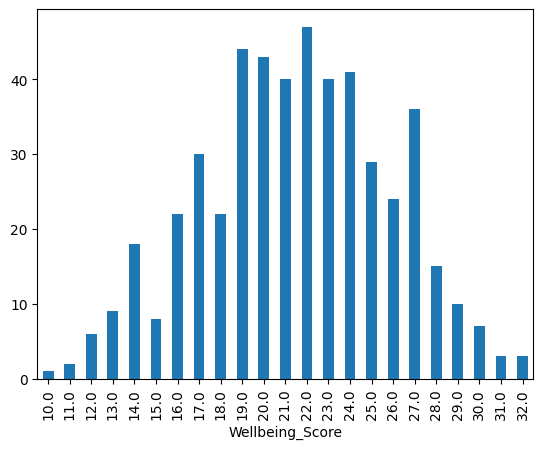

In [25]:
# Visual distribution using plot bar of the value count
socialmedia_clean["Wellbeing_Score"].value_counts().sort_index().plot(kind='bar') # sorting the x axis to be in order of smallest to largest

In [ ]:
#Get Days without social media count
socialmedia_clean["Days_Without_Social_Media"].value_counts() 

Days_Without_Social_Media
3.0    92
4.0    87
2.0    86
5.0    78
1.0    58
0.0    48
6.0    36
7.0    14
9.0     1
Name: count, dtype: int64

<Axes: xlabel='Days_Without_Social_Media'>

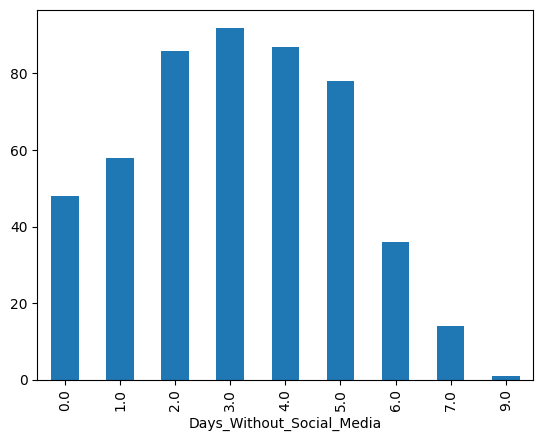

In [27]:
# Visual distribution using plot bar of the value count
socialmedia_clean["Days_Without_Social_Media"].value_counts().sort_index().plot(kind='bar') # Sorting the x axis to be in order of smallest to largest

### 5.2 Correlation Analysis

In [30]:
# Calculate correlation

corr_well = socialmedia_clean['Wellbeing_Score'].corr(socialmedia_clean['Days_Without_Social_Media'])
print(f'The correlation between a users wellbeing score and the number of days they do not use social media is {corr_well}')

corr_sleep = socialmedia_clean['Wellbeing_Score'].corr(socialmedia_clean['Sleep_Quality(1-10)'])
print(f'The correlation between a users wellbeing score and their sleep quality level is {corr_sleep}')

corr_stress = socialmedia_clean['Wellbeing_Score'].corr(socialmedia_clean['Stress_Level(1-10)'])
print(f'The correlation between a users wellbeing score and their level of stress is {corr_stress}')

corr_exer = socialmedia_clean['Wellbeing_Score'].corr(socialmedia_clean['Exercise_Frequency(week)'])
print(f'The correlation between a users wellbeing score and the number of days they exercise per week is {corr_exer}')

corr_happ = socialmedia_clean['Wellbeing_Score'].corr(socialmedia_clean['Happiness_Index(1-10)'])
print(f'The correlation between a users wellbeing score and their happiness level is {corr_happ}')


The correlation between a users wellbeing score and the number of days they do not use social media is 0.039431600137418005
The correlation between a users wellbeing score and their sleep quality level is 0.8073549671467235
The correlation between a users wellbeing score and their level of stress is -0.826198755390374
The correlation between a users wellbeing score and the number of days they exercise per week is 0.3595720955423168
The correlation between a users wellbeing score and their happiness level is 0.8655964863153824


### 5.3 Component Variable Analysis

In [ ]:
#5.1 Get Happiness Index count
socialmedia_clean["Happiness_Index(1-10)"].value_counts()

Happiness_Index(1-10)
10.0    162
8.0     106
9.0      94
7.0      76
6.0      39
5.0      16
4.0       7
Name: count, dtype: int64

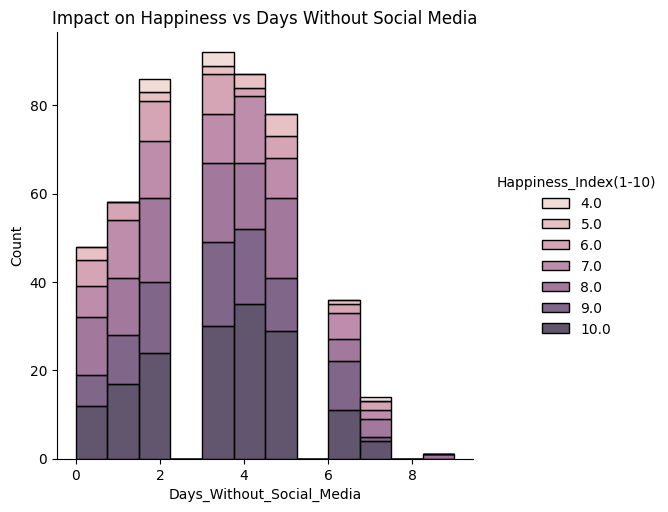

In [ ]:
# Visual distribution using stacked distplot - relationship between Happiness vs Days without Social Media
sns.displot(data=socialmedia_clean, x='Days_Without_Social_Media', hue='Happiness_Index(1-10)', multiple='stack')
plt.title('Impact on Happiness vs Days Without Social Media')
plt.show()

In [36]:
#5.1 Get Sleep quality count
socialmedia_clean["Sleep_Quality(1-10)"].value_counts()

Sleep_Quality(1-10)
6.0     120
7.0     116
5.0      93
8.0      67
4.0      51
9.0      36
3.0       9
10.0      6
2.0       2
Name: count, dtype: int64

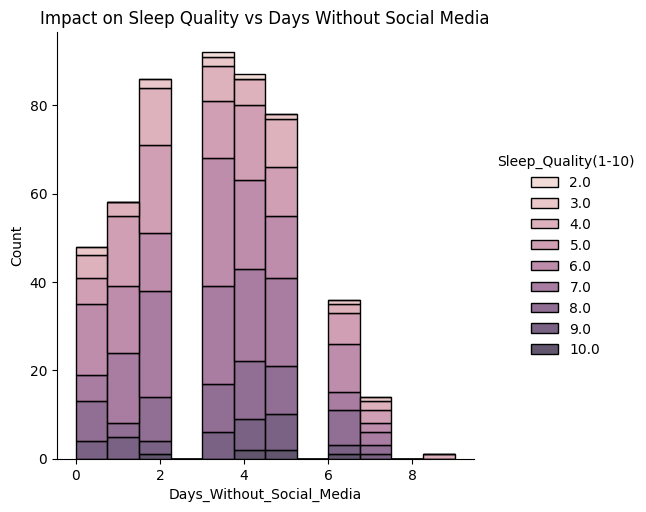

In [38]:
# Visual distribution using stacked distplot - relationship between Sleep vs Days without Social Media
sns.displot(data=socialmedia_clean, x='Days_Without_Social_Media', hue='Sleep_Quality(1-10)', multiple='stack')
plt.title('Impact on Sleep Quality vs Days Without Social Media')
plt.show()

In [ ]:
# Get Stress Level count
socialmedia_clean["Stress_Level(1-10)"].value_counts()

Stress_Level(1-10)
7.0     129
6.0     109
8.0      89
5.0      76
9.0      40
4.0      32
10.0     14
3.0      10
2.0       1
Name: count, dtype: int64

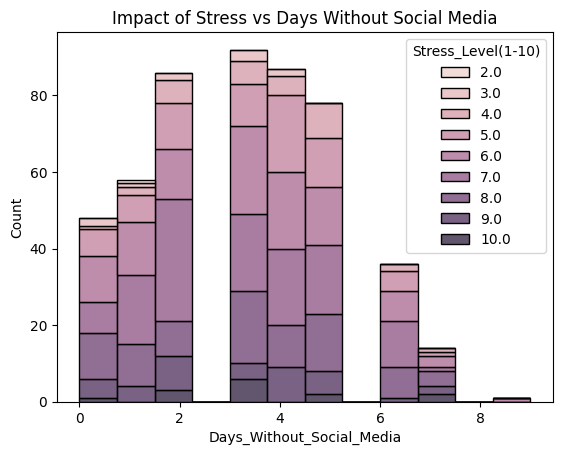

In [ ]:
# Visual distribution using stacked distplot - relationship between Stress vs Days without Social Media
sns.histplot(data=socialmedia_clean, x='Days_Without_Social_Media', hue='Stress_Level(1-10)', multiple='stack')
plt.title('Impact of Stress vs Days Without Social Media')
plt.show()

In [39]:
# Get Exercise Freqency count
socialmedia_clean["Exercise_Frequency(week)"].value_counts()

Exercise_Frequency(week)
2.0    132
3.0    117
1.0     91
4.0     75
0.0     43
5.0     36
6.0      4
7.0      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Impact on Exercise vs Days Without Social Media')

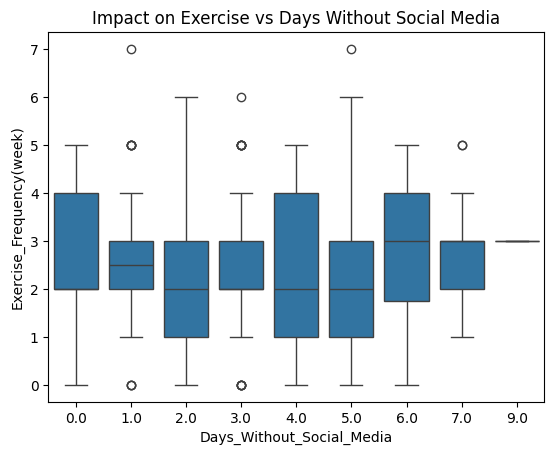

In [40]:
# Visual distribution using box plot showing the relationship between Exercise frequesncy vs Days without Social Media

sns.boxplot(data=socialmedia_clean, x="Days_Without_Social_Media", y="Exercise_Frequency(week)")
plt.title('Impact on Exercise vs Days Without Social Media')

From the box plot you can see that most of the users exercised betwen 2-4 days per week with the average being around 3 days. There are a few outliers with most of them exercising 5 days or more a week even though the max value shows users exercising between 4 to 5 days per week. From this there doesn't seem to be much correlation between exercise and number of days without social media.

### 5.4 

In [ ]:
# Analyse relationship with each wellbeing component


In [ ]:
# Visualise 


### 5.4 Key Findings - Question 1

**Summary:**



In summary we can see that there are some positive correlations and impacts on users wellbeing. Particularly with regards to users sleep quality and happiness levels. We can therefore show to social media companies that taking time away from social media is a positive thing, allowing users to reset their minds before returning back to their prefere social platform. We can help user understand that they will more productive in their work and personal life when they make small changes to how and when they use social media. These results can also provide wellbeing educators with data to help them promote healthier online behaviours to regular users of social media platforms.

## 6. Question 2: Social Media Platform Demographics

**Research Question:** What is the typical Age and Gender profile for users of different Social_Media_Platform, and how does their average Daily_Screen_Time compare?

### 6.1 Platform Overview

In [ ]:
# Get unique platforms and user counts


### 6.2 Age Profile by Platform

In [ ]:
# Calculate age statistics by platform



In [ ]:
# Visualise age distribution by platform


### 6.3 Gender Profile by Platform

In [ ]:
# Gender distribution by platform


In [ ]:
# Visualise gender distribution


### 6.4 Daily Screen Time by Platform

In [ ]:
# Calculate screen time statistics by platform


### 6.5 Visualisation: Screen Time Comparison

In [ ]:
# Box plot of screen time by platform


In [ ]:
# Bar chart of average screen time


### 6.6 Combined Demographics Summary

In [ ]:
# 

### 6.7 Key Findings - Question 2

**Summary:**



## 7. Question 3: Stress Level Predictors

**Research Question:** What are the most significant predictors of a user's Stress_Level, and can a model accurately predict whether a user falls into the high or low stress categories based on lifestyle factors?

### 7.1 Create Target Variable Categories

In [ ]:
# Create binary stress categories (High/Low)
# Adjust threshold based on our data

### 7.2 Select Predictor Variables

In [ ]:
# Define lifestyle factor predictors
    'Age',
    'Daily_Screen_Time',
    'Days_Without_Social_Media',
    'Exercise_Frequency',
    'Sleep_Quality',
    'Happiness_Index'
    # Add other relevant lifestyle factors


### 7.3 Exploratory Data Analysis for Stress

In [ ]:
# Compare predictors across stress categories

In [ ]:
# Visualise predictor distributions by stress category


### 7.4 Correlation Analysis

In [ ]:
# Calculate correlations with stress level


In [ ]:
# Visualise correlation heatmap


### 7.5 Prepare Data for Machine Learning

## either add your imports here or at the top of notebook

In [ ]:
# Prepare feature matrix and target variable
X = df_clean[predictors]
y = df_clean['Stress_Category'].map({'Low': 0, 'High': 1})

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Standardise features


### 7.6 Model Building - Logistic Regression

In [ ]:
# Train logistic regression model


# Make predictions


In [ ]:
# Evaluate chosen model


### 7.7 Model Building - Random Forest

In [ ]:
# Train random forest model


# Make predictions


In [ ]:
# Evaluate random forest


### 7.8 Feature Importance Analysis

In [ ]:
# Get feature importance from random forest

 

In [ ]:
# Visualise feature importance


### 7.9 Model Visualisation - Confusion Matrix

In [ ]:
# Plot confusion matrices


# Logistic Regression


# Random Forest


### 7.10 Model Visualization - ROC Curves

In [ ]:
# Plot ROC curves


# Logistic Regression ROC


# Random Forest ROC


# Diagonal reference line


### 7.11 Model Comparison Summary

In [ ]:
# Create comparison table


# Identify best model


### 7.12 Key Findings - Question 3

**Summary:**



## 8. Summary and Conclusions

### 8.1 Project Overview

same as start of notebook

### 8.2 Key Findings Summary

**Question 1: Days Without Social Media and Wellbeing**


**Question 2: Platform Demographics**


**Question 3: Stress Predictors**
-

### 8.3 Cross-Question Insights



### 8.4 Limitations



### 8.5 Recommendations

**For Individuals:**


**For Future Research:**


## credits